In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv("stats.csv", sep = ",", header=0)

print(df.isnull().sum())

match_id                    0
player_id                   0
pts                      5842
rank                       10
winner                      0
sets                        4
1                           4
2                         133
3                         422
4                       10342
5                       16516
avg_odds                10388
max_odds                10388
total_pts                   6
service_pts                 6
return_pts                  6
aces                        6
bp_saved                    6
bp_faced                    6
first_serve_rtn_won         6
second_serve_rtn_won        6
first_serve_in              6
dbl_faults                  6
first_serve_per             7
dtype: int64


In [7]:
updated_df = df.dropna(axis=0)

updated_df.info()

print(updated_df['winner'].value_counts())

print(updated_df[['1','winner']].groupby(['winner']).value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1784 entries, 14 to 18962
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   match_id              1784 non-null   object 
 1   player_id             1784 non-null   object 
 2   pts                   1784 non-null   float64
 3   rank                  1784 non-null   float64
 4   winner                1784 non-null   bool   
 5   sets                  1784 non-null   float64
 6   1                     1784 non-null   float64
 7   2                     1784 non-null   float64
 8   3                     1784 non-null   float64
 9   4                     1784 non-null   float64
 10  5                     1784 non-null   float64
 11  avg_odds              1784 non-null   float64
 12  max_odds              1784 non-null   float64
 13  total_pts             1784 non-null   float64
 14  service_pts           1784 non-null   float64
 15  return_pts         

In [8]:
updated_df.describe()

,pts,rank,sets,1,2,3,4,5,avg_odds,max_odds,...,service_pts,return_pts,aces,bp_saved,bp_faced,first_serve_rtn_won,second_serve_rtn_won,first_serve_in,dbl_faults,first_serve_per
count,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,...,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000
mean,1611.825673,67.359305,2.492713,5.065583,5.055493,5.013453,4.967489,5.304933,2.721962,27.123145,...,101.762332,57.770740,13.036435,8.084081,13.142937,27.496637,30.274103,98.102018,5.881726,0.614247
std,2008.411396,79.067996,0.500087,1.690149,1.686525,1.728920,1.820940,3.393778,2.409728,1008.185309,...,19.496598,11.865654,9.526673,4.102131,5.149615,8.563444,8.167380,19.891453,3.476227,0.065324
min,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.010000,1.010000,...,63.000000,22.000000,0.000000,0.000000,1.000000,7.000000,6.000000,53.000000,0.000000,0.392638
25%,615.000000,21.000000,2.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.350000,1.410000,...,90.000000,50.000000,7.000000,5.000000,9.000000,21.000000,24.000000,85.000000,3.000000,0.570470
50%,952.500000,48.000000,2.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.890000,2.020000,...,100.000000,57.000000,11.000000,8.000000,13.000000,27.000000,30.000000,96.000000,5.000000,0.615385
75%,1675.000000,89.000000,3.000000,6.000000,6.000000,6.000000,6.000000,6.000000,3.180000,3.500000,...,110.000000,66.000000,17.000000,11.000000,16.250000,33.000000,36.000000,108.000000,8.000000,0.658683
max,16790.000000,1415.000000,3.000000,7.000000,7.000000,7.000000,7.000000,70.000000,25.150000,42586.000000,...,385.000000,117.000000,113.000000,25.000000,31.000000,69.000000,61.000000,361.000000,26.000000,0.904762


In [9]:
# dummy variable, estandaritzar amb StandarScaler

# dummy variable
dmList = pd.get_dummies(updated_df['winner'], prefix='winner')
data1 = updated_df.join(dmList)
updated_df = data1

data_final=updated_df.drop(labels =['winner', 'winner_False', 'match_id', 'player_id'], axis=1)
data_final.info()
print()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividir mostra en 70% train:30% test
y = data_final.pop('winner_True')
X = data_final
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Estandaritzar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print('Dades desprès de Standaritzar')
print(X_train)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1784 entries, 14 to 18962
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pts                   1784 non-null   float64
 1   rank                  1784 non-null   float64
 2   sets                  1784 non-null   float64
 3   1                     1784 non-null   float64
 4   2                     1784 non-null   float64
 5   3                     1784 non-null   float64
 6   4                     1784 non-null   float64
 7   5                     1784 non-null   float64
 8   avg_odds              1784 non-null   float64
 9   max_odds              1784 non-null   float64
 10  total_pts             1784 non-null   float64
 11  service_pts           1784 non-null   float64
 12  return_pts            1784 non-null   float64
 13  aces                  1784 non-null   float64
 14  bp_saved              1784 non-null   float64
 15  bp_faced           

Variança explicada amb la primera i segona component: [0.19122134 0.11863697]


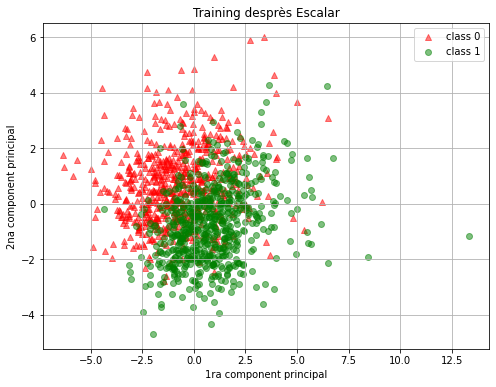

In [10]:
# PCA de dos components de les dades estandaritzades, canviar el svd_solver a full o arpack no canvia el resultat

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print('Variança explicada amb la primera i segona component:', pca.explained_variance_ratio_)

#visualització
fig, ax2 = plt.subplots(figsize=(8,6))

target_classes = range(0, 2)
colors = ("red", "green")
markers = ("^", "o")
      
for target_class, color, marker in zip(target_classes, colors, markers):
    ax2.scatter(
        x=pca.fit_transform(X_train)[y_train == target_class, 0],
        y=pca.fit_transform(X_train)[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker)
ax2.set_title("Training desprès Escalar")
ax2.set_xlabel("1ra component principal")
ax2.set_ylabel("2na component principal")
ax2.legend(loc="upper right")
ax2.grid()
plt.show()

Variança explicada [0.35154325 0.10241126]


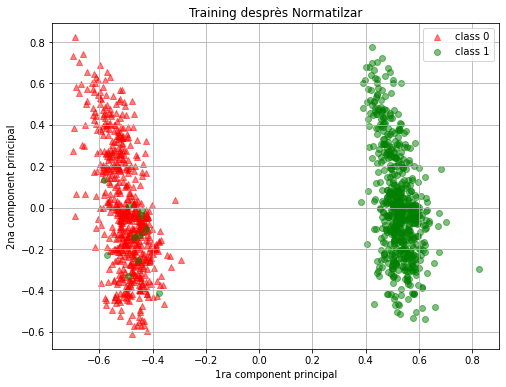

In [11]:
#normalitzar tenint en compte els fora de rang
# Normalització
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

norm = MinMaxScaler().fit(X_train)
X_train = norm.fit_transform(X_train)
X_test = norm.transform(X_test)

#PCA
pcan = PCA(n_components=2)

X_train = pcan.fit_transform(X_train)
X_test = pcan.transform(X_test)

print('Variança explicada', pcan.explained_variance_ratio_)

#Visualització
fig, ax3 = plt.subplots(figsize=(8,6))

for target_class, color, marker in zip(target_classes, colors, markers):
    ax3.scatter(
        x=pcan.fit_transform(X_train)[y_train == target_class, 0],
        y=pcan.fit_transform(X_train)[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker)
ax3.set_title("Training desprès Normatilzar")
ax3.set_xlabel("1ra component principal")
ax3.set_ylabel("2na component principal")
ax3.legend(loc="upper right")
ax3.grid()
plt.show()
